In [1]:
import numpy as np 
import pandas as pd

In [2]:
df=pd.read_csv('/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv')
df.head(5)

/tmp/ipykernel_19/3241677264.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [4]:
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [5]:
columns_to_drop = ['host id', 'country', 'country code','country code','lat','long']
df = df.drop(columns_to_drop, axis=1)
df.head(5)

,id,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,2020.0,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,True,flexible,Private room,2005.0,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,2005.0,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
df.columns

Index(['id', 'NAME', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365', 'house_rules',
       'license'],
      dtype='object')

In [7]:
len(df)

102599

In [8]:
df=df.drop_duplicates()

In [9]:
df=df.fillna(0)

In [10]:
len(df)

102058

In [11]:
replace_dict = {'\$': '', ',': ''}
df['price'] = df['price'].replace(replace_dict, regex=True)
df['service fee'] = df['service fee'].replace(replace_dict, regex=True)
df.head()

,id,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,2020.0,...,193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,0
1,1002102,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,...,28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,0,Elise,Manhattan,Harlem,True,flexible,Private room,2005.0,...,124,3.0,0.0,0,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",0
3,1002755,0,unconfirmed,Garry,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,2005.0,...,74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,0,0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,...,41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",0


In [12]:
room_type_counts = df['room type'].value_counts()
print(room_type_counts)

room type
Entire home/apt    53429
Private room       46306
Shared room         2208
Hotel room           115
Name: count, dtype: int64


In [13]:
cancellation_counts = df['cancellation_policy'].value_counts()
print(cancellation_counts)

cancellation_policy
moderate    34162
strict      33929
flexible    33891
0              76
Name: count, dtype: int64


In [14]:
top_10_names_highest_rated = df.nlargest(10, 'review rate number')['NAME']
print(top_10_names_highest_rated)

2                 THE VILLAGE OF HARLEM....NEW YORK !
6                                     BlissArtsSpace!
7                                     BlissArtsSpace!
9                  Cozy Clean Guest Room - Family Apt
17                  Perfect for Your Parents + Garden
19    Hip Historic Brownstone Apartment with Backyard
26                 Sunny Bedroom Across Prospect Park
40                LowerEastSide apt share shortterm 1
54                     Greenpoint Place...Has It All!
55                Beautiful Apartment in Manhattan!!!
Name: NAME, dtype: object


In [15]:
highest_rating = df['review rate number'].max()
print("The highest rating is:", highest_rating)

The highest rating is: 5.0


In [16]:
highest_rating = df['review rate number'].max()
highest_rated_hotels = df[df['review rate number'] == highest_rating]['NAME'].drop_duplicates()
print(highest_rated_hotels)
num_top_rated_hotels = len(highest_rated_hotels)
print("\nNumber of top-rated hotels:", num_top_rated_hotels)


2                    THE VILLAGE OF HARLEM....NEW YORK !
6                                        BlissArtsSpace!
9                     Cozy Clean Guest Room - Family Apt
17                     Perfect for Your Parents + Garden
19       Hip Historic Brownstone Apartment with Backyard
                              ...                       
99180                                    Bronx Apartment
99195                         Cozy room by South Seaport
99573                             Cozy 1bd in Kensington
99578                     Elmhurst 1st Fl Rightl Bedroom
99587      Parisian Style Apartment in Heart of Brooklyn
Name: NAME, Length: 15497, dtype: object

Number of top-rated hotels: 15497


In [17]:
filtered_hotels = df[(df['review rate number'] >= 3) & (df['review rate number'] <= 4)]

hotel_names = filtered_hotels['NAME'].drop_duplicates()
print(hotel_names)
num_average_hotels = filtered_hotels['NAME'].nunique()
print("\nNumber of hotels with a average rating:", num_average_hotels)

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
3                                                        0
4         Entire Apt: Spacious Studio/Loft by central park
5                Large Cozy 1 BR Apartment In Midtown East
                               ...                        
99181     Charming and cozy one-bedroom on Upper West Side
99182     Good location in queen\nNear by subway (3 block)
99190                      Beautiful Cozy Studio Apartment
99193    Times Square Prime Two Bedroom Near Port Autho...
99583           Elmhurst 1st Floor BR w/ Pvt. Bath&Balcony
Name: NAME, Length: 29968, dtype: object

Number of hotels with a average rating: 29968


In [18]:
low_rated_hotels = df[(df['review rate number'] >= 1) & (df['review rate number'] <= 2)]

hotels = low_rated_hotels['NAME'].drop_duplicates()
print(hotels)
num_low_hotels = low_rated_hotels['NAME'].nunique()
print("\nNumber of hotels with low rating", num_low_hotels)

42                     Beautiful Sunny Park Slope Brooklyn
43                       1bdr w private bath. in lofty apt
49                               bright and stylish duplex
50                                  Fort Greene brownstone
51         Blue Room for 2 in Brownstone for $1350 monthly
                               ...                        
94343    Modern Super Clean Midtown Apt in the Heart of...
99179    Beautiful Brooklyn Brownstone Entire Parlor Fl...
99191             Pretty and cozy 2BR apartment in Chelsea
99192    Beautiful Duplex & Private Terrace in Williams...
99194                                      A place to stay
Name: NAME, Length: 20209, dtype: object

Number of hotels with low rating 20209


In [19]:
unrated_hotels = df[df['review rate number'].isnull()]
unrated_hotels['review rate number'] = 0

hotels_unrated = unrated_hotels['NAME'].drop_duplicates()
print(hotels_unrated)
num_unrated_hotels = unrated_hotels['NAME'].nunique()
print("\nNumber of hotels with zero rating:", num_unrated_hotels)

Series([], Name: NAME, dtype: object)

Number of hotels with zero rating: 0


In [20]:
df['price'] = pd.to_numeric(df['price'])

top_10_expensive_hotels = df.nlargest(10, 'price')['NAME']
print("Top 10 most expensive hotels:")
print(top_10_expensive_hotels)

Top 10 most expensive hotels:
2589                     Beautiful Central Harlem sleeps 4
5207         Bushwick Room w/ Private Entrance & Bathroom!
7453     Sun-filled bedroom in East Village / Gramercy NYC
9805                   Private room in hip & historic area
10204                   1BR GARDEN APT 25 MIN TO MANHATTAN
12575                     Cozy room in Chic Apt Astoria NY
16277               Luxurious SOHO 2 BR Washington Sq Park
16835                                Ideal Bushwick Rental
17080             West 50th Street, Luxury Svcd Studio Apt
18785     An Urban Oasis in the Heart of Downtown Brooklyn
Name: NAME, dtype: object


In [21]:
top_10_cheapest_hotels = df.nsmallest(10, 'price')['NAME']
print("\nTop 10 cheapest hotels:")
print(top_10_cheapest_hotels)


Top 10 cheapest hotels:
147                              Retreat in Williamsburg
148                                              NYC Zen
210                  Private Garden Apt • New Renovation
211    Modern comfort in art infused landmark Brownstone
212                  NOHO/EAST VILLAGE, PRIVATE 1/2 BATH
213                         Sleek & Comfortable Soho Apt
403                    Cozy and Bright One Bedroom in BK
404        Forest Hills Apt minutes to midtown Manhattan
405                  Spacious West Village 1 b/room King
516                    Comfort at Crossroads of Downtown
Name: NAME, dtype: object


In [22]:
neighborhood_prices = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

top_10_expensive_neighborhoods = neighborhood_prices.head(10)
print("\nTop 10 most expensive neighborhoods:")
print(top_10_expensive_neighborhoods)


Top 10 most expensive neighborhoods:
neighbourhood
New Dorp                  1045.000000
Chelsea, Staten Island    1042.000000
Fort Wadsworth            1024.000000
Little Neck                817.750000
Jamaica Hills              812.904762
Shore Acres                805.142857
Arden Heights              804.888889
Midland Beach              796.176471
Mill Basin                 775.142857
Riverdale                  768.736842
Name: price, dtype: float64


In [23]:
top_10_cheapest_neighborhoods = neighborhood_prices.tail(10)
print("\nTop 10 cheapest neighborhoods:")
print(top_10_cheapest_neighborhoods)


Top 10 cheapest neighborhoods:
neighbourhood
Randall Manor                 472.400000
West Farms                    463.166667
Emerson Hill                  443.800000
Bay Terrace, Staten Island    429.500000
Castleton Corners             417.230769
Richmondtown                  373.400000
Breezy Point                  309.888889
Rossville                     300.666667
Spuyten Duyvil                293.444444
Lighthouse Hill               107.666667
Name: price, dtype: float64


In [24]:
oldest_hotels = df[df['Construction year'].notnull()]
oldest_hotels = oldest_hotels.sort_values('Construction year').head(10)['NAME']
print('Oldest Hotels in NYC:', oldest_hotels)

Oldest Hotels in NYC: 826                           Room next to Columbia Uni.
193    Lovely Apt & Garden;  Legal;  Best Area; Ameni...
194                  1 Bedroom in 2 Bdrm Apt- Upper East
195                           Lower East Side $57~/night
196                          Prime Location in Manhattan
197                                ( F) Excellent/Pvt Rm
199                    Big Room/Washer-Dryer/Wifi/AC/JMZ
200                        cozy studio with parking spot
201                   Clean and convenient 2BR apartment
202                                                    0
Name: NAME, dtype: object


In [25]:
newest_hotels = df[df['Construction year'].notnull()]  
newest_hotels = newest_hotels.sort_values('Construction year', ascending=False).head(10)['NAME']
print('Newest Hotels in NYC:', newest_hotels)

Newest Hotels in NYC: 58035      Our Beautiful Loft in the Heart of Williamsburg
74947                      10 min to Manhattan: Cozy share
75014     Modern & Cozy 2 BR Private Apartment in Brooklyn
35574                                  Times square luxury
35583                         Clean & Spacious room in NYC
35607                    Luxury Loft - Home away from Home
74986    Able to walk to free ferry in Manhattan. Many,Bus
35634                                           NewPlace 4
74981                                 Dash Production loft
74974    Luxury Studio High Rise 10 mins from Times Sq NY!
Name: NAME, dtype: object


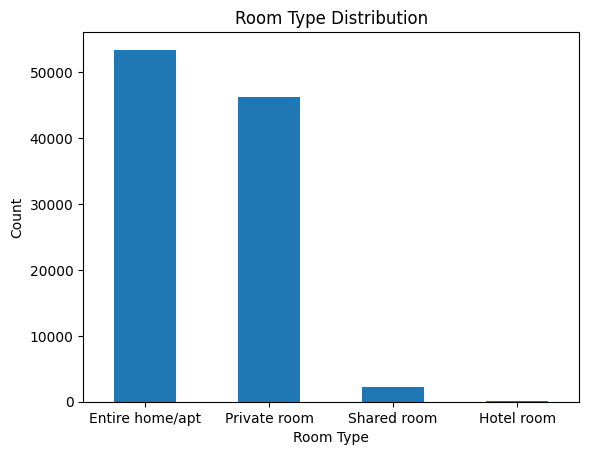

In [26]:
import matplotlib.pyplot as plt

room_type_counts = df['room type'].value_counts()
room_type_counts.plot(kind='bar')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

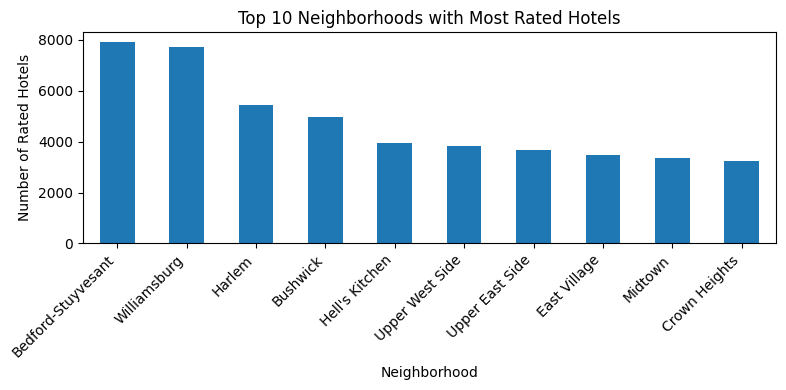

In [27]:

neighborhood_counts = df[df['review rate number'].notnull()].groupby('neighbourhood')['NAME'].count().sort_values(ascending=False)
top_neighborhoods = neighborhood_counts.head(10)
plt.figure(figsize=(8, 4))
top_neighborhoods.plot(kind='bar')
plt.title('Top 10 Neighborhoods with Most Rated Hotels')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Rated Hotels')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

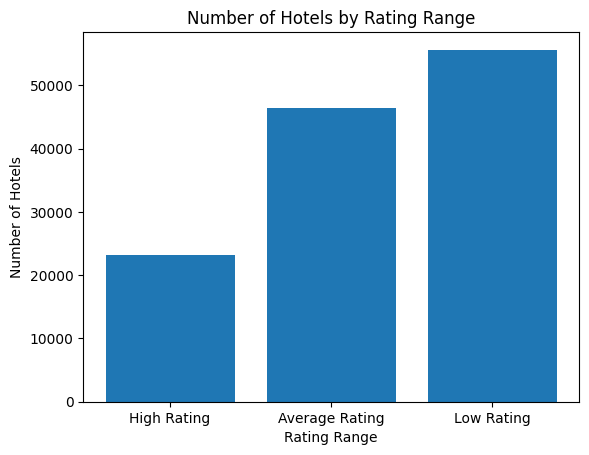

In [28]:
high_rating_range = (4.5, 5.0)
average_rating_range = (3.0, 4.5)
low_rating_range = (0.0, 3.0)

high_rated_hotels = df[df['review rate number'].between(*high_rating_range)]
average_rated_hotels = df[df['review rate number'].between(*average_rating_range)]
low_rated_hotels = df[df['review rate number'].between(*low_rating_range)]

hotel_counts = {
    "High Rating": len(high_rated_hotels),
    "Average Rating": len(average_rated_hotels),
    "Low Rating": len(low_rated_hotels),
}

plt.bar(hotel_counts.keys(), hotel_counts.values())

plt.title("Number of Hotels by Rating Range")
plt.xlabel("Rating Range")
plt.ylabel("Number of Hotels")

plt.show()


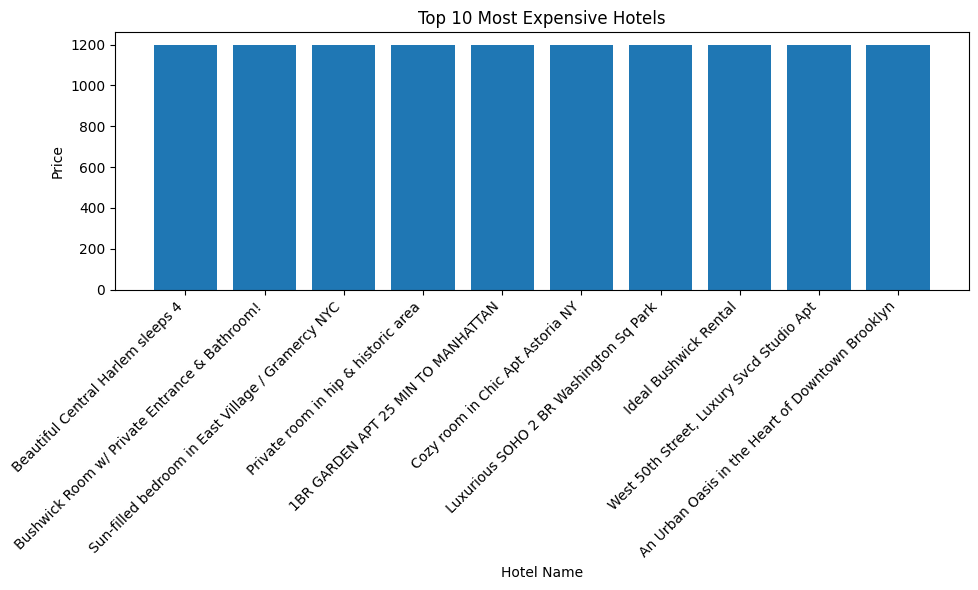

In [29]:
top_10_expensive_hotels_df = df.nlargest(10, 'price')
hotels = top_10_expensive_hotels_df['NAME'].to_list()
prices = top_10_expensive_hotels_df['price'].to_list()

plt.figure(figsize=(10, 6))
plt.bar(hotels, prices)

plt.title("Top 10 Most Expensive Hotels")
plt.xlabel("Hotel Name")
plt.ylabel("Price")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

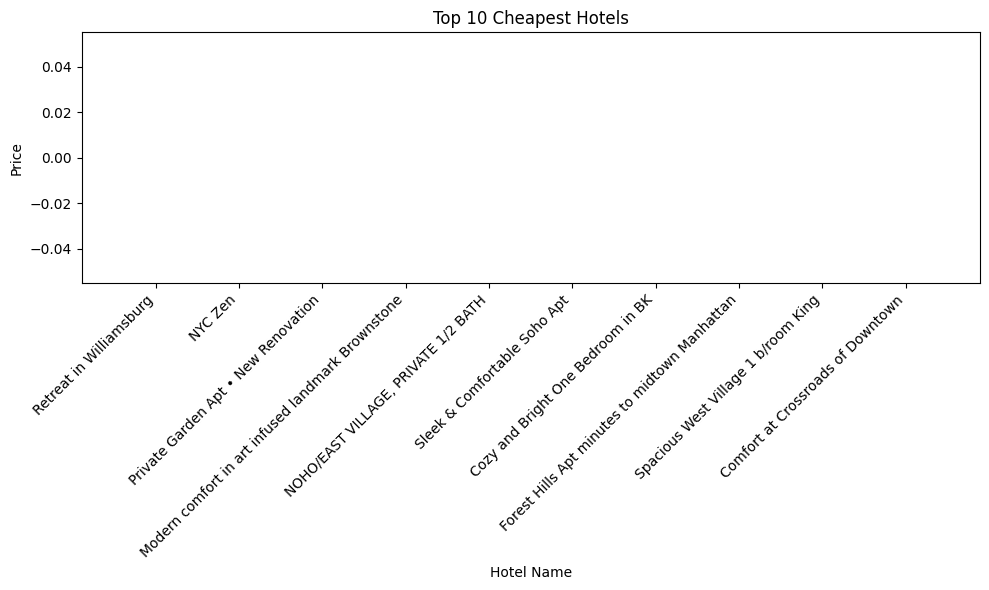

In [30]:
top_10_cheapest_hotels_df = df.nsmallest(10, 'price')
hotels = top_10_cheapest_hotels_df['NAME'].to_list()
prices = top_10_cheapest_hotels_df['price'].to_list()

plt.figure(figsize=(10, 6))
plt.bar(hotels, prices)

plt.title("Top 10 Cheapest Hotels")
plt.xlabel("Hotel Name")
plt.ylabel("Price")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

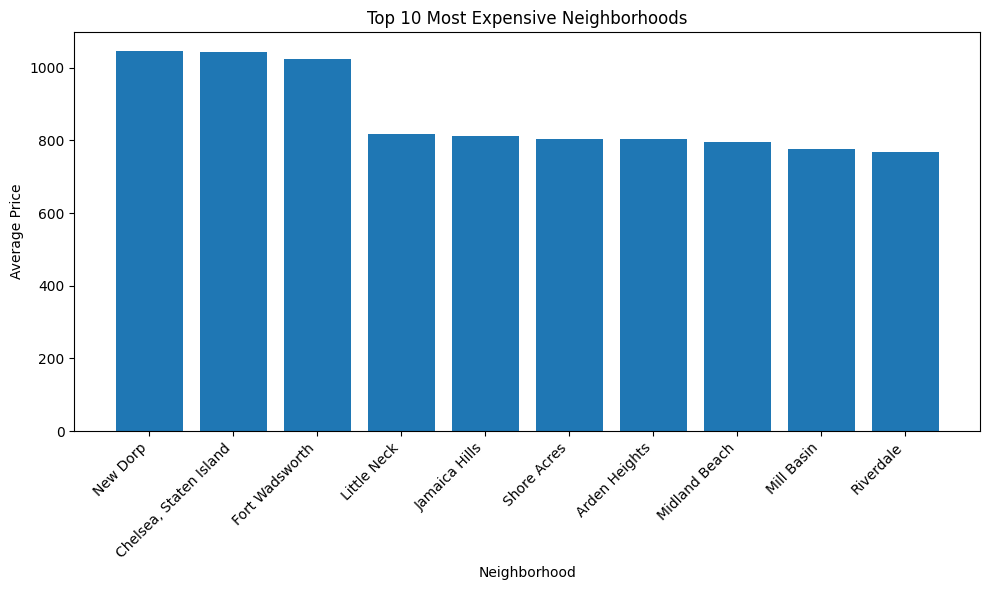

In [31]:
top_10_expensive_neighborhoods = neighborhood_prices.head(10)
neighborhoods = top_10_expensive_neighborhoods.index.to_list()
average_prices = top_10_expensive_neighborhoods.to_list()

plt.figure(figsize=(10, 6))
plt.bar(neighborhoods, average_prices)

plt.title("Top 10 Most Expensive Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

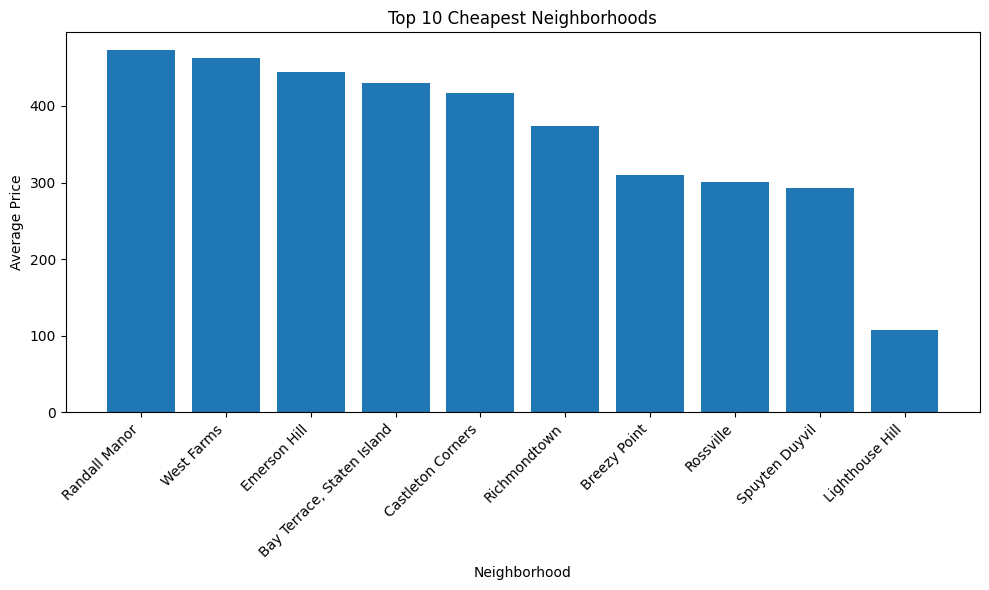

In [32]:
top_10_cheapest_neighborhoods = neighborhood_prices.tail(10)
neighborhoods = top_10_cheapest_neighborhoods.index.to_list()
average_prices = top_10_cheapest_neighborhoods.to_list()

plt.figure(figsize=(10, 6))
plt.bar(neighborhoods, average_prices)

plt.title("Top 10 Cheapest Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

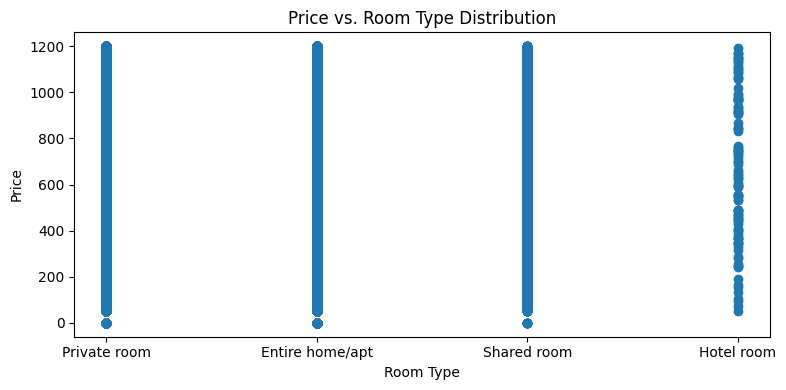

In [33]:
plt.figure(figsize=(8, 4))
plt.scatter(df['room type'], df['price'])
plt.title("Price vs. Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Price")

plt.tight_layout()
plt.show()

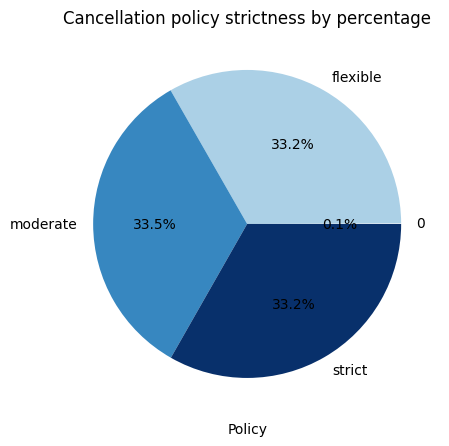

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
policy = df.groupby('cancellation_policy')['id'].count().plot(
    kind='pie', autopct='%1.1f%%', colormap='Blues'
).set(title='Cancellation policy strictness by percentage', xlabel='Policy', ylabel=None)
plt.show()


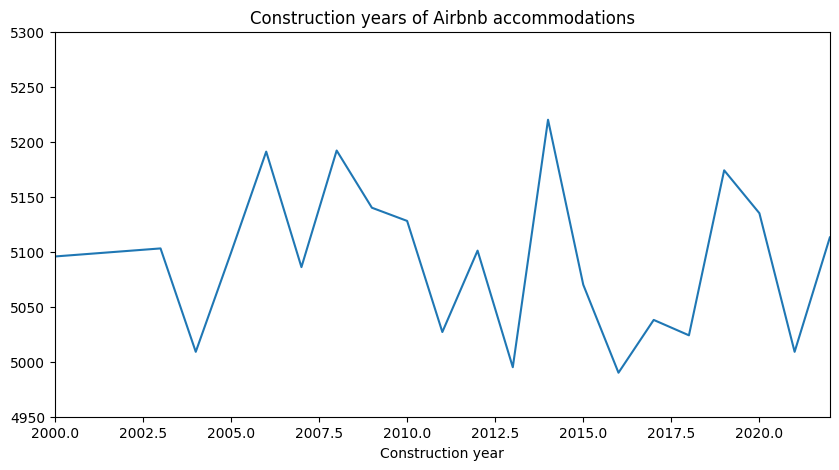

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby('Construction year')['id'].count().plot(kind='line')
ax.set(title='Construction years of Airbnb accommodations', xlabel='Construction year')
ax.set_xlim(2000, 2022)
ax.set_ylim(4950, 5300)
plt.show()

<Axes: xlabel='availability 365', ylabel='Count'>

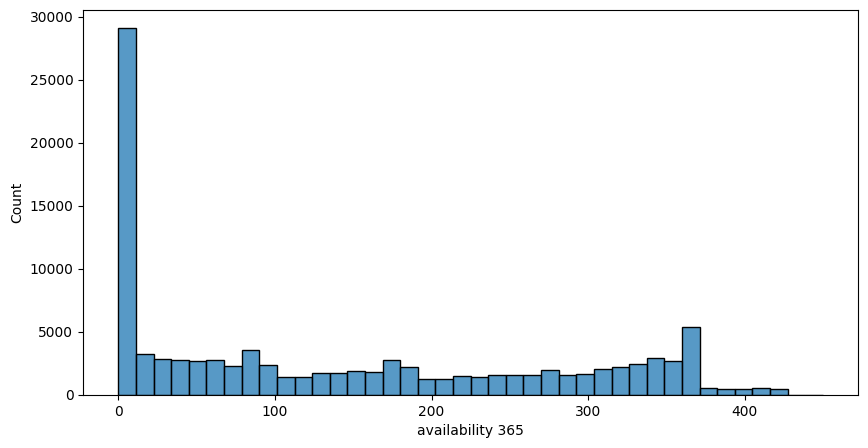

In [36]:
import seaborn as sns
fig, ax= plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='availability 365',binrange=(0,450))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

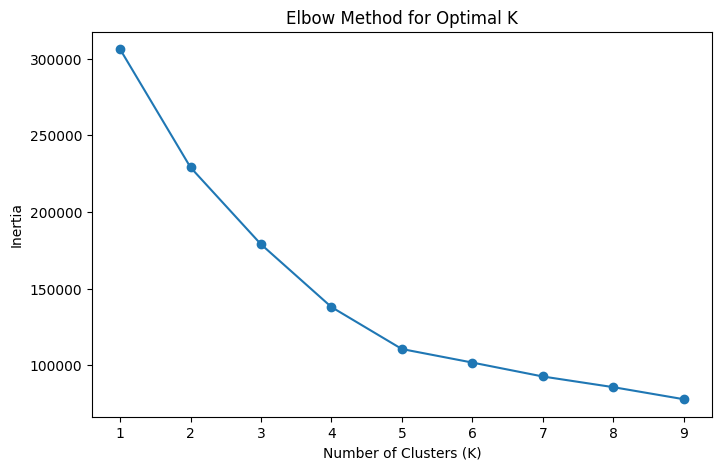

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


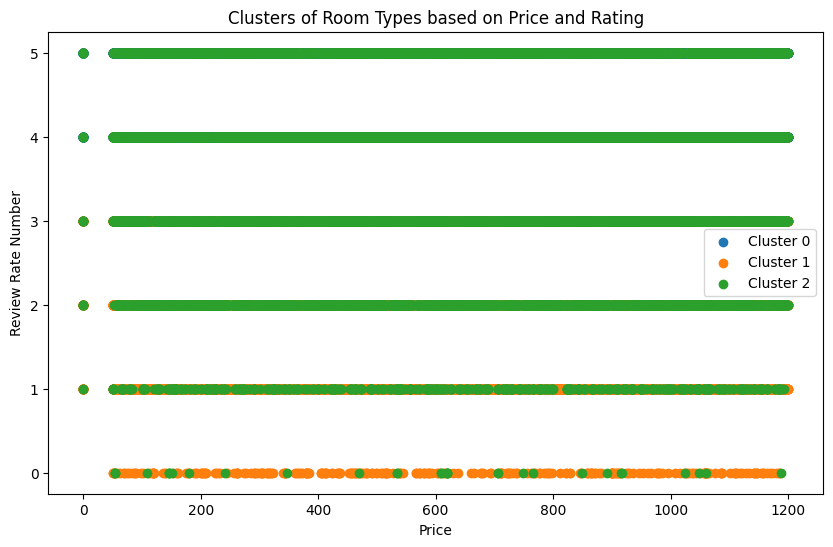

              price  reviews per month  review rate number        room type
Cluster                                                                    
0        621.619886           0.673233            4.513816  Entire home/apt
1        622.161591           0.630479            2.205485  Entire home/apt
2        635.669254           4.306738            3.348720  Entire home/apt


In [37]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


features = ['price', 'reviews per month', 'review rate number']
data = df[features].copy()

data.dropna(inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data['Cluster'] = clusters
df['Cluster'] = clusters 
plt.figure(figsize=(10, 6))
for cluster_label in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster_label]
    plt.scatter(cluster_data['price'], cluster_data['review rate number'], label=f'Cluster {cluster_label}')

plt.title('Clusters of Room Types based on Price and Rating')
plt.xlabel('Price')
plt.ylabel('Review Rate Number')
plt.legend()
plt.show()

cluster_analysis = df.groupby('Cluster').agg({
    'price': 'mean',
    'reviews per month': 'mean',
    'review rate number': 'mean',
    'room type': lambda x: x.value_counts().index[0] 
})
print(cluster_analysis)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df[['reviews per month', 'review rate number', 'price']]
y = df['room type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))


Accuracy: 0.71
                 precision    recall  f1-score   support

Entire home/apt       0.73      0.74      0.74     10644
     Hotel room       0.06      0.04      0.05        23
   Private room       0.70      0.70      0.70      9311
    Shared room       0.47      0.45      0.46       434

       accuracy                           0.71     20412
      macro avg       0.49      0.48      0.49     20412
   weighted avg       0.71      0.71      0.71     20412



Based on the comprehensive analysis encompassing room types, prices, and review rates, several trends emerge in customer preferences:

- **Entire home/apt and Private room:** These categories, characterized by higher prices and better reviews, are favored by customers seeking well-reviewed accommodations or willing to pay more for privacy and comfort.

- **Shared room:** Priced lower and appealing to those seeking economical options or specific social interactions during their stay, this category draws customers with distinct preferences.

- **Hotel room:** Our analysis faces challenges predicting trends for this category, indicating factors influencing hotel room choices might not align with the dataset's attributes.

Furthermore, examining the model's performance for each room type reveals:

- **Entire home/apt and Private room:** These categories exhibit strong model performance, accurately predicting customer preferences based on identified features.

- **Shared room:** Although less popular, the model demonstrates moderate success in predicting shared accommodation preferences.

- **Hotel room:** Challenges persist in accurately predicting customer choices, reflecting less distinct defining features within the dataset for this category.

Overall, customers strongly favor entire home/apartment and private room accommodations based on identified features. However, hotel rooms pose a challenge for the model due to the absence of clearly defining attributes in the dataset, making it harder to predict customer preferences accurately.